Sus


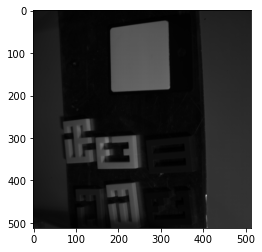

In [1]:
from spectral import imshow, view_cube
import spectral.io.envi as envi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import time
#from wx import glcanvas

print("Sus")

#dark_ref = envi.open('C:\\Users\\olafu\\Python\\007-20220304T162544Z-001\\007\\capture\\DARKREF_007.hdr','C:\\Users\\olafu\\Python\\007-20220304T162544Z-001\\007\\capture\\DARKREF_007.raw')
dark_ref = envi.open('/home/daniel/Documents/023/DARKREF_023.hdr','/home/daniel/Documents/023/DARKREF_023.raw')
#white_ref = envi.open('C:\\Users\olafu\\Python\\007-20220304T162544Z-001\\007\\capture\\WHITEREF_007.hdr','C:\\Users\\olafu\\Python\\007-20220304T162544Z-001\\007\\capture\\WHITEREF_007.raw')
white_ref = envi.open('/home/daniel/Documents/023/WHITEREF_023.hdr','/home/daniel/Documents/023/WHITEREF_023.raw')
#data_ref = envi.open('C:\\Users\\olafu\\Python\\007-20220304T162544Z-001\\007\\capture\\007.hdr','C:\\Users\\olafu\\Python\\007-20220304T162544Z-001\\007\\capture\\007.raw')
data_ref = envi.open('/home/daniel/Documents/023/023.hdr','/home/daniel/Documents/023/023.raw')

white_nparr = np.array(white_ref.load())
dark_nparr = np.array(dark_ref.load())
data_nparr = np.array(data_ref.load())

corrected_nparr = np.divide(
    np.subtract(data_nparr, dark_nparr),
    np.subtract(white_nparr, dark_nparr))

view = imshow(corrected_nparr, (100, 100, 100))
#view_cube(corrected_nparr, bands=[29,19,9])

In [2]:
bands = np.genfromtxt('bands5.csv', delimiter=',') #þarft að downloada þessu

#Ég er að velja að analyzera appelsínugulu töskuna hér
leaf_pixel_y = 470
leaf_pixel_x = 400

leaf_pixel = corrected_nparr[
    leaf_pixel_y:leaf_pixel_y+1,
    leaf_pixel_x:leaf_pixel_x+1,
    :]

leaf_pixel_squeezed = np.squeeze(leaf_pixel)

print(len(bands))
print(len(leaf_pixel))
print(len(leaf_pixel_squeezed))

204
1
204


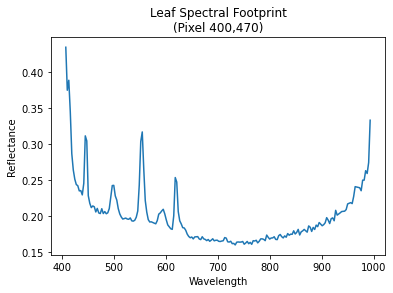

In [3]:
plt.plot(bands, leaf_pixel_squeezed) #Sýnir reflectance fyrir tiltekinn pixel, hellað
plt.title('Leaf Spectral Footprint\n(Pixel {},{})'.format(
    leaf_pixel_x, leaf_pixel_y))
plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
plt.show()

In [4]:
def extract_roi(arr, x, y, w, h, intensity, line):
    roi = arr[y:y+h, x:x+w, :]

    bounding_box = arr
    bounding_box[y-line:y, x-line:x+w+line, :] = intensity # garis atas
    bounding_box[y:y+h, x-line:x, :] = intensity # garis kiri
    bounding_box[y+h:y+h+line, x-line:x+w+line, :] = intensity # garis bawah
    bounding_box[y:y+h, x+w:x+w+line, :] = intensity # garis kanan

    return (roi, bounding_box)

ImageView object:
  Display bands       :  (100, 100, 100)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.016491753980517387, 2.7496252059936523]
    G: [0.016491753980517387, 2.7496252059936523]
    B: [0.016491753980517387, 2.7496252059936523]

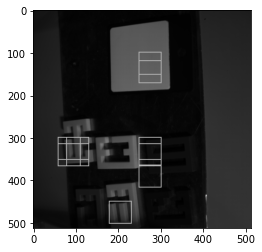

In [9]:
#Snýst um að finna rates of interests þar sem maður vill analyzera gögninn
#Þetta er allt manual, spuring hvort það sé hægt að breyta því?
coordinates = [
    (250, 100),
    (250, 120),
    (80, 300),
    (80, 315),
    (180, 450)]
rois = [] # returned ROIs
length = 50 # width and height
intensity = 2 # bounding box line intensity
line = 2 # bounding box line width
bounding_boxed = corrected_nparr

for coordinate in coordinates:
    (x, y) = coordinate
    (roi, bounding_boxed) = extract_roi(
        bounding_boxed, x, y, length, length, intensity, line)
    rois.append(roi)

imshow(bounding_boxed, (100, 100, 100))

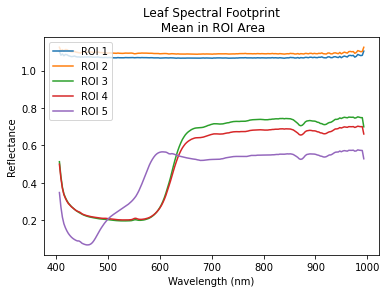

In [10]:
for i in range(len(rois)): #Þetta er sexy, taskan er með mjög svipað reflectance pattern
    roi = rois[i]
    intensity = []
    for b in range(roi.shape[2]):
        intensity.append(np.mean(roi[:, :, b]))
    plt.plot(bands, intensity, label='ROI {}'.format(i+1))

plt.legend(loc='upper left')
plt.title('Leaf Spectral Footprint\n Mean in ROI Area')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.show()